Analista: Almir Fraga Junior<br>

<b>PRIMEIRA MISSÃO</b><br>

ANALISE DOS DADOS

In [4]:
#Importo as bibliotecas que irei utilizar
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

#Importo os dataframes que irei trabalhar
dfIP = pd.read_csv("IpAddress_to_Country.csv")
df = pd.read_csv("dataFraud.csv")

#A coluna class do dataframe define se o caso é verdadeiro ou falso, sendo 1 para fraude e 0 para não fraude
#Renomeio a coluna class, pois esta é uma palavra reservada do python e não aceita realizarmos nenhuma função
df = df.rename(columns ={'class':'classification'})
dfFraude = df.query('classification >= 1').reset_index(drop=True)
dfFraude.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,classification
0,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
1,171711,2015-01-11 01:51:15,2015-01-11 01:51:16,52,YPLQGKBAAULUV,Direct,IE,F,35,1.120619e+09,1
2,59780,2015-01-04 22:32:33,2015-01-16 01:13:43,31,WUMOBGUCBOXPO,SEO,FireFox,M,36,1.752167e+09,1
3,151705,2015-01-07 03:44:53,2015-01-07 03:44:54,48,URHCRIXOMLJMH,SEO,Chrome,F,27,2.836025e+09,1
4,345865,2015-02-01 05:59:23,2015-02-20 08:09:10,36,FKQPZUELCRKBL,SEO,IE,M,30,2.740590e+09,1


<b>Extração dos dados do dataframe para análise e plotagem gráfica para análise visual</b>

In [5]:
#Faço a separação da data para facilitar na elaboração dos graficos

divisao = dfFraude['purchase_time'].str.split(' ')
dataCompra = divisao.str.get(0)
dfFraude['purchase_date'] = dataCompra
divisao = dfFraude['purchase_date'].str.split('-')
mesCompra = divisao.str.get(1)
dfFraude['purchase_mounth'] = mesCompra

Podemos observar que durante o período de avaliação, tivemos um pico no primeiro mês


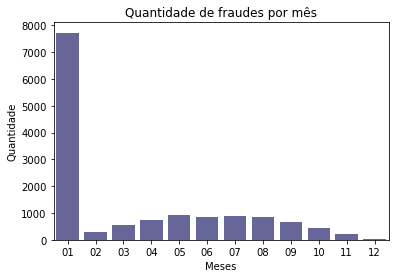

In [6]:
#Extração da quantidade de fraudes por mês do dataframe, para plotagem gráfica
grafData = dfFraude['user_id'].groupby(dfFraude['purchase_mounth']).count().reset_index().rename(columns={'user_id':'count'})

#Propriedades do grafico
sb.barplot(x="purchase_mounth", y="count", color="blue",saturation=.2, data=grafData)
plt.title('Quantidade de fraudes por mês')
plt.ylabel('Quantidade')
plt.xlabel('Meses')

#Conclusão dos dados
print('Podemos observar que durante o período de avaliação, tivemos um pico no primeiro mês')

In [7]:
#Extração e exibição do valor total perdido com fraudes
totalDeFraude = dfFraude['purchase_value'].sum()

print("O total perdido em fraude no periodo avaliado foi de R$",totalDeFraude,',00')

O total perdido em fraude no periodo avaliado foi de R$ 523488 ,00


As fraudes causadas pelo genero feminino foi de 40.4 %, e pelo masculino foi de 59.6 %.


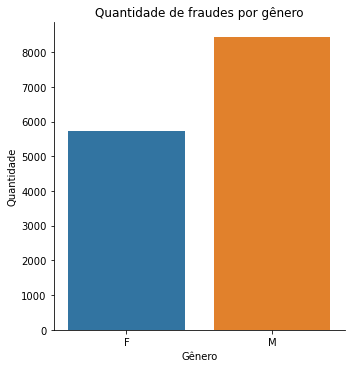

In [8]:
#Extração da quantidade de fraudes por genero do dataframe, para plotagem gráfica
qtdeSex = dfFraude[['user_id']].groupby(dfFraude['sex']).count().reset_index()
qtdeFem = qtdeSex['user_id'].values[0]
qtdeMasc = qtdeSex['user_id'].values[1]

#Propriedades do grafico
sb.catplot(x='sex', y='user_id', kind='bar', data=qtdeSex)
plt.title('Quantidade de fraudes por gênero')
plt.ylabel('Quantidade')
plt.xlabel('Gênero')

#Conclusão dos dados
print('As fraudes causadas pelo genero feminino foi de',round((qtdeFem / (qtdeFem + qtdeMasc))*100, 2),'%, e pelo masculino foi de',round((qtdeMasc / (qtdeFem + qtdeMasc))*100, 2),'%.')

A idade mediana que tivemos mais fraudes é 33 anos.
Por isso podemos observar um pico na distribuição entre 30 e 35 anos.


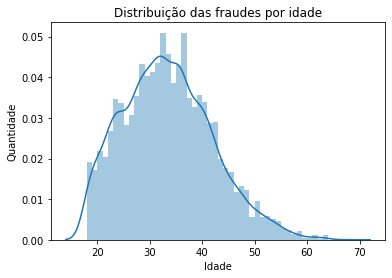

In [9]:
#Extração da quantidade de fraudes por idade do dataframe, para plotagem gráfica
ageData = dfFraude['user_id'].groupby(dfFraude['age']).count().reset_index()

#Propriedades do grafico
sb.distplot(dfFraude['age'])
plt.title('Distribuição das fraudes por idade')
plt.ylabel('Quantidade')
plt.xlabel('Idade')

#Conclusão dos dados
print('A idade mediana que tivemos mais fraudes é',int(dfFraude['age'].median()), 'anos.')
print('Por isso podemos observar um pico na distribuição entre 30 e 35 anos.')

As fraudes pelo Google (Ads) e direcionamento do buscador padrão (SEO) são maiores que as de origem onde o usuario digita o endereço site (Direct).


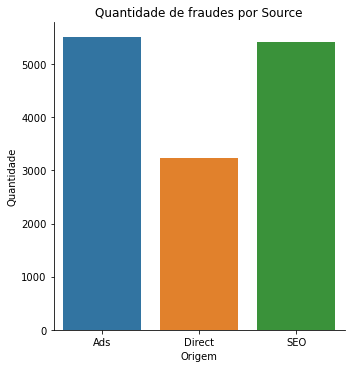

In [10]:
#Extração da quantidade de fraudes por origem do dataframe, para plotagem gráfica
dfSource = dfFraude['user_id'].groupby(dfFraude['source']).count().reset_index()

#Propriedades do grafico
sb.catplot(x='source', y='user_id', kind='bar', data=dfSource)
plt.title('Quantidade de fraudes por Source')
plt.ylabel('Quantidade')
plt.xlabel('Origem')

#Conclusao dos dados
print('As fraudes pelo Google (Ads) e direcionamento do buscador padrão (SEO) são maiores que as de origem onde o usuario digita o endereço site (Direct).')

In [11]:
#Extração dos dados para verificação de itens duplicados na coluna user_id

print(dfFraude['user_id'].value_counts().sort_values(ascending=False))
print()

#Conclusão dos dados
print('Não temos itens duplicados na coluna de user_id')

362497    1
143398    1
16392     1
251915    1
60749     1
         ..
245752    1
79865     1
245704    1
380870    1
133204    1
Name: user_id, Length: 14151, dtype: int64

Não temos itens duplicados na coluna de user_id


In [12]:
#Extração dos dados para verificação de itens duplicados na coluna device_id

print(dfFraude["device_id"].value_counts())
print()

#Conclusão dos dados
print('Como podemos observar, apesar das fraudes serem realizadas todas as vezes por um user_id diferente, muitas delas são feitas pelo mesmo device_id')


CQTUVBYIWWWBC    19
ZUSVMDEZRBDTX    19
ITUMJCKWEYNDD    19
KIPFSCNUGOLDP    19
EQYVNEGOFLAWK    19
                 ..
FPGEUUDHNXYWR     1
KUYEILVOMPPTU     1
POCOJXVEHGKZW     1
MTZPYZLQSPCTS     1
PIGDOZNYDRNYN     1
Name: device_id, Length: 6987, dtype: int64

Como podemos observar, apesar das fraudes serem realizadas todas as vezes por um user_id diferente, muitas delas são feitas pelo mesmo device_id


In [13]:
#Extração de dados para contagem da quantidade e dos valores de fraude por dispositivo
dfDevice = dfFraude['user_id'].groupby(dfFraude['device_id']).count().reset_index().rename(columns={'user_id':'contDevice'})

#Atribuo esta nova coluna ao dataframe primario
dfFraude = dfFraude.set_index('device_id').join(dfDevice.set_index('device_id')).reset_index()

#Contagem das fraudes que foram realizadas mais de uma vez por dispositivo
totalDevice = dfFraude['user_id'].loc[dfFraude['contDevice'] > 1].count()

#Conclusão dos dados
print('O total de fraudes do dataframe analisado foi de', totalDevice, 'casos.')
print('Tivemos um total de', round((totalDevice / dfFraude['user_id'].count()) * 100, 2), '% de casos que efetivaram a compra em um unico dispositivo, porém em usuarios diferentes')
print('Esses casos somaram uma perda de R$',dfFraude['purchase_value'].loc[dfFraude['contDevice'] > 1].sum(),',00')


O total de fraudes do dataframe analisado foi de 8208 casos.
Tivemos um total de 58.0 % de casos que efetivaram a compra em um unico dispositivo, porém em usuarios diferentes
Esses casos somaram uma perda de R$ 304039 ,00


In [14]:
#Crio uma função para classificar o ip_address conforme o país (Este processo demora cerca de 20 segundos para aplicação)

def origemIp(ip) :
    try :
        return dfIP.country[(dfIP.lower_bound_ip_address < ip)                            
                                & 
                                (dfIP.upper_bound_ip_address > ip)].iloc[0]
    except IndexError :
        return "Não definido"

dfFraude["IP_country"] = dfFraude.ip_address.apply(origemIp)

Neste gráfico temos a quantidade de fraudes por país de forma decrescente em forma de ranking.


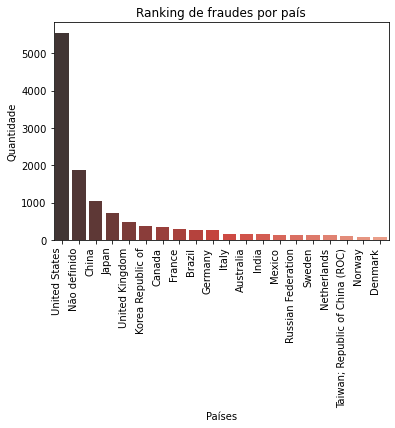

In [15]:
#Extração das fraudes por país, para plotagem gráfica
dfCountry = dfFraude['user_id'].groupby(dfFraude['IP_country']).count().sort_values(ascending=False).reset_index().head(20)

#Propriedades do gráfico
p = sb.barplot(x="IP_country", y="user_id", palette="Reds_d", data=dfCountry)
p.set_xticklabels(p.get_xticklabels(), rotation = 90, horizontalalignment = 'right')
plt.title('Ranking de fraudes por país')
plt.ylabel('Quantidade')
plt.xlabel('Países')

#Conclusão dos dados
print('Neste gráfico temos a quantidade de fraudes por país de forma decrescente em forma de ranking.')

<b>Conclusão final</b>

Através desta analise exploratória dos dados, podemos concluir que:

> Tivemos um valor total de perda no periodo avaliado de R$ 523488,00.

> O maior volume de fraudes ocorreu no mês de Janeiro.

> As fraudes causadas pelo genero feminino foi de 40.4 %, e pelo masculino foi de 59.6 %.

> A idade mediana que tivemos mais fraudes é 33 anos.

> As fraudes pelo Google (Ads) e direcionamento do buscador padrão (SEO) são maiores que as de origem onde o usuario digita o endereço site (Direct).

> As fraudes são realizadas todas as vezes por um user_id diferente, porém muitas delas são feitas pelo mesmo device_id.

> Tivemos um total de 8208 casos deste tipo, que somados representam 58% dos casos e um prejuizo total de R$304039,00.

> No ranking dos países, tivemos entre os 5 primeiros o Estados Unidos, uma quantidade desconhecida, possivelmente causada pelo não rastreamento do IP, seguidos por China, Japão e Reino Unido.

<b>Solução das fraudes</b>

Uma solução simples e efetiva, para redução das fraudes seria justamente o bloqueio de compras repentinas, originadas de um device_id utilizando um user_id diferente.

<b>SEGUNDA MISSÃO</b>

Possiveis práticas que podem reduzir o impacto de fraudes para a empresa JaLevei.

Chargeback: Para uma diminuição do chargeback, devemos ter um cuidado na hora do cadastro do cliente, justamente para que ele precise fornecer o máximo de informações de forma que não comprometa sua experiência, assim certamente o fraudador terá um pouco mais de dificuldade. Outra solução é imtermediar as formas de pagamento por operadores terceirizados, por exemplo PayPal, Picpay, mais recentemente o Pix.

Account Takeover: Para dificultarmos a ação do fraudador, neste caso devemos implementar uma confirmação de 2 pasos para realização de qualquer alteração cadastral de sua conta, com isso qualquer mudança que precise ser realizada deve ser feita uma liberação por email, sms ou telefone.

Autofraude: Este tipo de fraude entra também no modelo Chargeback, e realizando as ações para evita-lo automaticamente diminuimos este tipo de fraude.

Outros tipos de fraudes: Um tipo de fraude que pode gerar prejuizos indiretos e diretos, é justamente o Phishing que envia mensagens supostamente se passando pela empresa, ou até mesmo cria um site igual ao da empresa, solicitando qualquer tipo de dado, e isso pode ser evitado com campanhas, informativos que o cliente tem acesso, especificando que a empresa não solicita dados desta forma.

